In [9]:
#Gerekli Func
def readPDF(path:str):
    from pypdf import PdfReader
    PATH_TO_PDF = path
    PDF_TEXT = ''

    reader = PdfReader(PATH_TO_PDF)

    for page in reader.pages:
        PDF_TEXT += page.extract_text()
        
    return(PDF_TEXT)

def kelimeBulutu(text):
    import numpy as np
    import matplotlib.pyplot as plt
    from PIL import Image

    from wordcloud import WordCloud

    wc = WordCloud(
            background_color = 'black',
            contour_width = 2,
            contour_color = 'black',
            colormap = 'BuPu_r',
            width = 800,
            height = 500,
            stopwords=None
  
        ).generate(text)
    plt.axis("off")
    plt.imshow(wc)

def kelimeSayacı(text):
    from collections import Counter
 
    kelimeler = text.lower().split()
    frekans = Counter(kelimeler)
    print(frekans)

def anahtarKelimeler(text):
    #2. Özel Kodlama: Anahtar Kelime Çıkartma 
    #Anahtar kelime çıkartma, metin analizinde önemli bir adımdır.
    #Kütüphane Önerisi: RAKE (Rapid Automatic Keyword Extraction), KeyBERT

    #pip install keybert
    from keybert import KeyBERT

    model = KeyBERT('distilbert-base-nli-mean-tokens')
    anahtar_kelime = model.extract_keywords(text, keyphrase_ngram_range=(1, 2),stop_words='english', top_n=5)
    return(anahtar_kelime)

def duyguAnalizi(text):
    from textblob import TextBlob
    from textblob import Word
     
    # Metni TextBlob ile analiz et     
    blob = TextBlob(text)
    #print(f"Duygu Puanı: {blob.sentiment.polarity}")  # -1 ile 1 arasında bir değer
    #print(f"Duygu Yoğunluğu: {blob.sentiment.subjectivity}")  # 0 ile 1 arasında bir değer

    return(blob.sentiment)

def kelimeAgaci(text):
    import re
    import nltk
    import networkx as nx
    import matplotlib.pyplot as plt
    from collections import Counter
    from nltk.corpus import stopwords

    def preprocess_text(text):
        # Noktalama işaretlerini kaldır ve tüm kelimeleri küçük harfe dönüştür
        text = re.sub(r'[^\w\s]', '', text)  # Noktalama işaretlerini kaldır
        text = text.lower()  # Küçük harfe dönüştür
        return text        
    def remove_stopwords(kelimeler):   
        nltk.download('stopwords') 
        stop_words = set(stopwords.words('turkish'))#Hangi dil için kullanılacaksa...
        kelimeler = [kelime for kelime in kelimeler if kelime not in stop_words]
        return kelimeler
    
    clean_text = preprocess_text(text)
    kelimeler = clean_text.split()
    #kelimeler = remove_stopwords(kelimeler)

    bigrams = list(nltk.bigrams(kelimeler))
    bigram_freq = Counter(bigrams)
    print("En sık geçen kelime bağlantıları:", bigram_freq.most_common(10))
    G = nx.Graph()
    
    for bigram, freq in bigram_freq.items():
        G.add_edge(bigram[0], bigram[1], weight=freq)
    plt.figure(figsize=(12, 8))
    edges = G.edges(data=True)
    weights = [d['weight'] for (u, v, d) in edges]  # Ağırlık değerleri

    pos = nx.spring_layout(G, seed=42)  # Konum düzenlemesi
    nx.draw(
        G, 
        pos, 
        with_labels=True, 
        node_color='lightblue', 
        font_weight='bold', 
        node_size=3000, 
        width=[0.1 * w for w in weights]  # Kenar kalınlığını ağırlığa göre ayarla
    )

    plt.title('Metin Ağı: Bağlantılı Kelimeler')
    plt.show()

def kelimeAgaciFilter(text,filterDEGREE):
    import re
    import nltk
    import networkx as nx
    import matplotlib.pyplot as plt
    from collections import Counter
    from nltk.corpus import stopwords

    def preprocess_text(text):
        # Noktalama işaretlerini kaldır ve tüm kelimeleri küçük harfe dönüştür
        text = re.sub(r'[^\w\s]', '', text)  # Noktalama işaretlerini kaldır
        text = text.lower()  # Küçük harfe dönüştür
        return text        
    def remove_stopwords(kelimeler):   
        nltk.download('stopwords') 
        stop_words = set(stopwords.words('turkish'))#Hangi dil için kullanılacaksa...
        kelimeler = [kelime for kelime in kelimeler if kelime not in stop_words]
        return kelimeler
    
    clean_text = preprocess_text(text)
    kelimeler = clean_text.split()
    #kelimeler = remove_stopwords(kelimeler)

    bigrams = list(nltk.bigrams(kelimeler))
    bigram_freq = Counter(bigrams)
    print("En sık geçen kelime bağlantıları:", bigram_freq.most_common(10))
    G = nx.Graph()
    
    for bigram, freq in bigram_freq.items():
        G.add_edge(bigram[0], bigram[1], weight=freq)

    plt.figure(figsize=(12, 8))

    edges = G.edges(data=True)
    weights = [d['weight'] for (u, v, d) in edges]  # Ağırlık değerleri
         
    pos = nx.spring_layout(G, seed=42)  # Konum düzenlemesi
    
    filtered_nodes = [node for node, degree in G.degree() if degree > filterDEGREE]
    subgraph = G.subgraph(filtered_nodes)
    
    nx.draw(
        subgraph, 
        pos, 
        with_labels=True, 
        node_color='lightblue', 
        font_weight='bold', 
        node_size=3000, 
        width=[0.1 * w for w in weights]  # Kenar kalınlığını ağırlığa göre ayarla
    )

    plt.title('Metin Ağı: Bağlantılı Kelimeler')
    plt.show()

 



In [10]:
import sqlite3 as sql
import pandas 

con = sql.connect("scienedirect.db")
cursor = con.cursor()

cursor.execute("SELECT * FROM ArtikelContent") 
rows = cursor.fetchall()

koalas = pandas.DataFrame(rows)

#contributors içerenler çıkart
koalas = koalas[ ~koalas.iloc[:,0].str.lower().str.contains('contributors')]


title = koalas.iloc[:,0]
abstract = koalas.iloc[:,1]
abstract2 = koalas.iloc[:,2]
introduction = koalas.iloc[:,3]
snippets = koalas.iloc[:,4]
longText = koalas.iloc[:,5]
author = koalas.iloc[:,6]
authorAffiliation = koalas.iloc[:,7]
date = koalas.iloc[:,8]
html = koalas.iloc[:,9]

In [11]:
#Durum0 -> Selçuk değil
#Durum1 => Selçuktan

SelcuktanYazarlar = []

for index in range(0,len(authorAffiliation)):
    results = {}    
    for t in authorAffiliation.iloc[index].split('\n'):
        if(len(t)==0):continue
        durum=None
        x = t.split('->')
        x1,x2 = x

        if ('selcuk' in x2.lower()):
            durum=1
        elif ('selçuk' in x2.lower()):
            durum=1
        else:
            durum=0
        
        results[x1.strip()] = durum   
        print(x1,' -> ',durum,' -> ',x2)

    if len(results)==1:durum=2 #Tüm yazarlar Selçuktandır

    if durum==2:#Tüm yazarlar Selçuktandır
        print('Tüm yazarlar Selçuktandır')
        print(author.iloc[index].strip().split(','))
        SelcuktanYazarlar = SelcuktanYazarlar + author.iloc[index].strip().split(',')[:-1]
    else:#Yazarlar Selçuktan olup olmadığını kontrol et
        for t in author.iloc[index].strip().split(','):
            if len(t)==0:continue
            text = t.strip().split(' ')

            if(len(text)>0):
                for word in text:
                    if word in results.keys(): #Tüm kalıpları Results içinde arar
                        if results[word] == 1: 
                            print('1 - Selçuk Üniversite    ->', t) #Yazar Selçuktandır
                            SelcuktanYazarlar.append(t)
                        elif results[word] == 0:
                            print('0 - Selçuk dışı          ->', t)     
            
            print(text,'\n')


    print(
        '''
        >--------------->---------------<---------------<
        >--------------->---------------<---------------<
        ''')

a   ->  1  ->   Selcuk University, Faculty of Pharmacy, Department of Biochemistry, 42075, Konya, Turkey
b   ->  1  ->   Selcuk University, Faculty of Science, Department of Chemistry, 42075, Konya, Turkey
c   ->  1  ->   Selcuk University, Faculty of Pharmacy, Department of Clinical Pharmacy, 42075, Konya, Turkey
d   ->  1  ->   Selcuk University, Faculty of Pharmacy, Department of Pharmacology, 42075, Konya, Turkey
e   ->  1  ->   Selcuk University, Faculty of Medicine, Department of Pathology, 42075, Konya, Turkey
f   ->  1  ->   Selcuk University, Faculty of Medicine, Department of Medical Biochemistry, 42075, Konya, Turkey
g   ->  1  ->   Selcuk University, Faculty of Veterinary, Department of Biostatistics, 42075, Konya, Turkey
1 - Selçuk Üniversite    -> Esra Maltas Cagil a 
['Esra', 'Maltas', 'Cagil', 'a'] 

1 - Selçuk Üniversite    ->  Fatih Ozcan b 
['Fatih', 'Ozcan', 'b'] 

1 - Selçuk Üniversite    ->  Cengizhan Ceylan c 
['Cengizhan', 'Ceylan', 'c'] 

1 - Selçuk Üniversite 

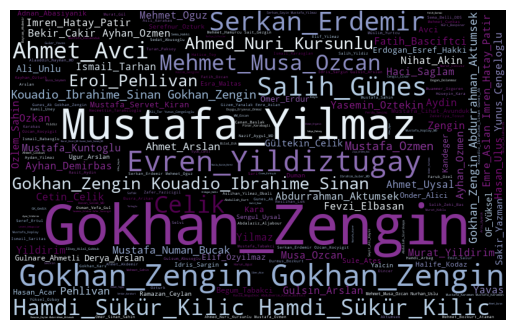

In [12]:
import re

NameList = []

# Türkçe karakterleri İngilizce karakterlere çeviren bir fonksiyon
def turkce_harf_kaldir(text):
    replacements = str.maketrans("öçşığüÖÇŞİĞÜ", "ocsigüOCSIGÜ")
    return text.translate(replacements)

for fullName in SelcuktanYazarlar:
    correctedName = ""
    for i in fullName.split(" "):
        i = re.sub(r'[^\w\s]', '', i.strip())  # Noktalama işaretlerini kaldır
        i = turkce_harf_kaldir(i)  # Türkçe karakterleri kaldir
        if len(i) > 1:  # Boşlukları atla
            if not (i.lower() in ["phd", "prof", "dr"]):  # Tagleri isimden kaldır
                correctedName += i + "_"

    correctedName = correctedName.strip()

    if len(correctedName) > 4:  # Ad ve Soyad birlikte 4 harften uzun olduğunu varsayıyorum
        NameList.append(correctedName[:-1])  # İsmin arkasındaki '_' kaldır

# Kelime bulutu için hazırlanmış metni oluştur
kelimeBulutu(' '.join(NameList))


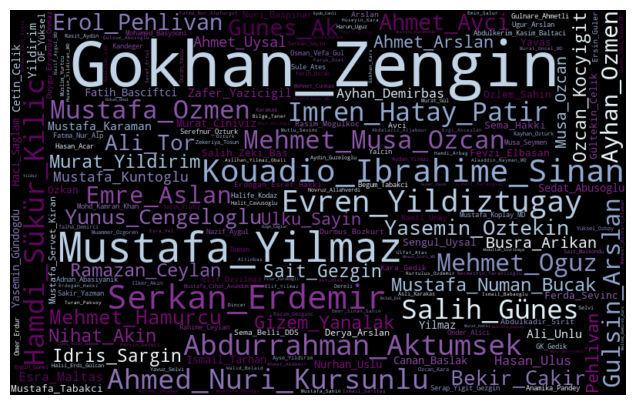

In [13]:
import matplotlib.pyplot as plt
from collections import Counter
from wordcloud import WordCloud

word_counts = Counter(NameList)
word_counts = {word: freq for word, freq in word_counts.items() if word.lower() not in ['aydin','sari','celik','kara','zengin','kaya']}

# Kelime bulutu oluşturma
wordcloud = WordCloud(
    background_color = 'black',
    contour_width = 2,
    contour_color = 'black',
    colormap = 'BuPu_r',
    width = 800,
    height = 500,
    random_state=49
).generate_from_frequencies(word_counts)

# Kelime bulutunu görselleştirme
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()
 


In [14]:
word_counts

{'Esra_Maltas_Cagil': 4,
 'Fatih_Ozcan': 10,
 'Cengizhan_Ceylan': 3,
 'Seyma_Tetik_Rama': 3,
 'Kubra_Yilmaz': 2,
 'Zeliha_Esin_Celik': 6,
 'Abdullah_Sivrikaya': 8,
 'Harun_Yonar': 2,
 'Emre_Altintas': 3,
 'Ali_Sahin': 3,
 'Seyit_Erol': 1,
 'Halil_Ozer': 7,
 'Murat_Gül': 10,
 'Ali_Furkan_Batur': 2,
 'Mehmet_Kaynar': 5,
 'Ozcan_Kilic': 6,
 'Serdar_Goktas': 3,
 'Fatma_Tas_Arslan': 5,
 'Sevinc_Akkoyun': 2,
 'Sibel_Kücükoglu': 2,
 'Deniz_KocogluTanyer': 3,
 'Murat_Konak': 4,
 'Hanifi_Soylu': 3,
 'Ilker_Galip_Atak': 1,
 'Ali_Yasar': 2,
 'Mukaddes_Saklan': 1,
 'Ayse_Yildirim': 10,
 'Elif_Ozyilmaz': 13,
 'Mustafa_Yilmaz': 119,
 'Demet_Tekcan': 1,
 'Ilknur_Kulhas_Celik': 1,
 'Merih_Onal': 4,
 'Hasibe_Artac': 4,
 'Abdurrahman_Taha_Gülderen': 1,
 'Gülsah_Oztürk': 3,
 'Deniz_Ulukus': 6,
 'Murat_Yildirim': 23,
 'Yasemin_Oztekin': 26,
 'Nuran_Mammadova': 1,
 'Nizamettin_Bozbay': 1,
 'Gokcen_Orgul': 1,
 'Alaaddin_Yorulmaz_MD': 1,
 'Ahmet_Sert_MD': 3,
 'Fuat_Bugrul_MD': 1,
 'Hasan_Ali_Güler_MD': 1,
 '

In [16]:
import pandas, numpy

titleDuyguAnalizi = pandas.DataFrame(
     [duyguAnalizi(i) for i in title]
)

print(
    numpy.median(titleDuyguAnalizi.polarity),
    numpy.median(titleDuyguAnalizi.subjectivity)
)

titleDuyguAnalizi.describe()




0.0 0.0


polarity  subjectivity
count  4579.000000   4579.000000
mean      0.026564      0.248040
std       0.175770      0.308345
min      -0.800000      0.000000
25%       0.000000      0.000000
50%       0.000000      0.000000
75%       0.000000      0.458188
max       0.800000      1.000000

In [17]:
import pandas,numpy 

abstractDuyguAnalizi = pandas.DataFrame([duyguAnalizi(i) for i in abstract])

print(
    numpy.median(titleDuyguAnalizi.polarity),
    numpy.median(titleDuyguAnalizi.subjectivity)
)

titleDuyguAnalizi.describe()




0.0 0.0


polarity  subjectivity
count  4579.000000   4579.000000
mean      0.026564      0.248040
std       0.175770      0.308345
min      -0.800000      0.000000
25%       0.000000      0.000000
50%       0.000000      0.000000
75%       0.000000      0.458188
max       0.800000      1.000000

In [ ]:
resultTITLE = anahtarKelimeler(title) #anahtar kelime sayısını (n) 3 
temp = []
for box in resultTITLE:    
    for name,number in box:
        temp.append(name)       

finalResultTITLE = ' '.join(temp)


resultAbstract = anahtarKelimeler(abstract) #anahtar kelime sayısını (n) 5
temp = []
for box in resultAbstract:
    for name,number in box:
        temp.append(name)

finalResultAbstract = ' '.join(temp)

In [ ]:
#İsimlerin arkasındaki yanlış harfleri kaldırır
NameList = []

for articleAuthors in author:
    for name in articleAuthors.split(","):  
        NameList.append(name)

tempAuthor = '\n'.join(NameList)
print(NameList)
kelimeBulutu(tempAuthor)

In [ ]:
from nltk.tokenize import word_tokenize
from nltk.tree import Tree

from nltk import pos_tag, ne_chunk

tempAuthor = [
    'Esra Maltas Cagil a ',
    ' Fatih Ozcan b ',
    ' Cengizhan Ceylan c ',
    ' Seyma Tetik Rama d ', 
    ' Kubra Yilmaz a ', 
    ' Zeliha Esin Celik e ',
    ' Abdullah Sivrikaya f ',
    ' Harun Yonar g ', 
    ' ',
    'Emre Altıntaş a ',
    ' Ali Şahin b '
]

personsInText = tempAuthor

for name in NameList:
    tokens = word_tokenize(name)
    tagged_tokens = pos_tag(tokens)
    ne_chunked_tokens = ne_chunk(tagged_tokens)

    for chunk in ne_chunked_tokens:
        if type(chunk) == Tree :           
            [print(Name) for Name,Tag in chunk.leaves()]
    print("-----")


In [ ]:
from nltk.tree import Tree

for chunk in ne_chunked_tokens:
    if type(chunk) == Tree :
        print(chunk.leaves())

In [ ]:
from nltk.tree import Tree

for chunk in ne_chunked_tokens:
    if type(chunk) == Tree :
        for x,y in chunk.leaves():
            if y != 'NNP':
                print('aint NNP')
            else:
                print(x,y)


In [ ]:
import nltk

from nltk import ne_chunk, pos_tag, word_tokenize
from nltk.tree import Tree

text = ' Kubra Yilmaz a '
nltk_results = ne_chunk(pos_tag(word_tokenize(text)))
for nltk_result in nltk_results:
    if type(nltk_result) == Tree:
        name = ''
        for nltk_result_leaf in nltk_result.leaves():
            name += nltk_result_leaf[0] + ' '
        print ('Type: ', nltk_result.label(), 'Name: ', name)
nltk_results

In [ ]:
import nltk
from nltk.util import bigrams
from collections import Counter


bigram_freq = Counter(correctedNameList)
print(bigram_freq.most_common(5))  # En yaygın 5 bigram

Counter(correctedNameList)

In [ ]:
kelimeBulutu(' '.join(correctedNameList))

In [ ]:
kelimeBulutu(' '.join(title))

In [ ]:
#Anahtar Kelimeler 
kelimeBulutu(finalResultTITLE)

In [ ]:
kelimeBulutu(temp = ' '.join(abstract))

In [ ]:
kelimeBulutu(finalResultAbstract) #Anahtar Kelimeler 

In [ ]:
tempAbstract = '   '.join(abstract)
kelimeAgaciFilter(tempAbstract,45)

In [ ]:
temp = '   '.join(title)
kelimeAgaciFilter(temp,15)